# 8. Die Q-Sphere

Die **Q-Sphere** bietet die Möglichkeit, den Zustand eines Qubit-Registers, bestehend aus mehreren Qubits, auf einer Kugeloberfläche darzustellen. In diesem Notebook erfahren Sie, wie man mithilfe des Visualisierungsmoduls von Qiskit eine Q-Sphere-Visualisierung erstellen kann.

Weil diese Art der Darstellung kompakter und übersichtlicher ist als jene des Bloch-Multivektors, wird sie bei der Visualisierung der Ergebnisse aus dem Statevector-Simulator im Allgemeinen gegenüber dem Bloch-Multi-Vector bevorzugt. Zuerst muss die Funktion wieder von `qiskit.visualization` importiert werden:


In [1]:
from qiskit.visualization import plot_state_qsphere

## Darstellung durch Amplituden

Die  `plot_state_qsphere()` Methode akzeptiert Daten zum Zeichnen der Q-Sphere als Zustandsvektor oder als Dichtematrix wie z. B. `[0.5, 0.5, 0.5, 0.5]` für den Zustand

$$ |\psi\rangle = \tfrac{1}{2}|00\rangle +\tfrac{1}{2}|01\rangle +\tfrac{1}{2}|10\rangle +\tfrac{1}{2}|11\rangle$$



Wir plotten den zwei-Qubit Zustand, indem wir `plot_state_qsphere()` direkt den Zustandsvektor `[0.5, 0.5, 0.5, 0.5]` übergeben:

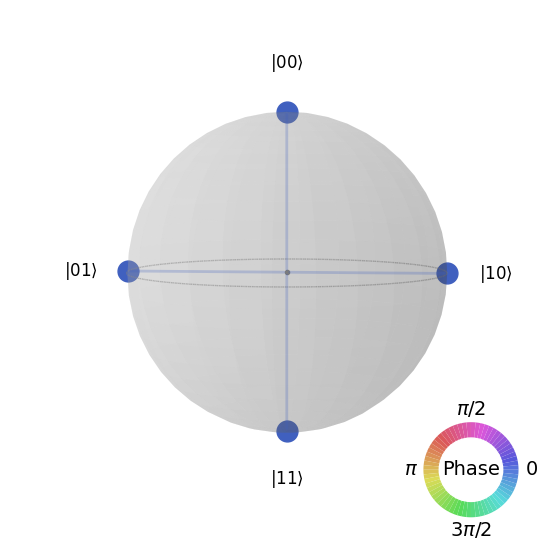

In [2]:
plot_state_qsphere([0.5, 0.5, 0.5, 0.5])

Auf dieser Kugel werden also nicht Zustandsvektoren, sondern die Komponenten $|00\rangle$, $|01\rangle$, $|10\rangle$ und $|11\rangle$ (...) des **Registerzustands** dargestellt und zwar nach folgendem System:
Die Komponenten werden von oben nach unten nach ansteigender Quersumme (Anzahl Einsen) sortiert. Komponenten mit gleicher Quersumme sind auf gleicher Höhe.

Rechts unten neben der Kugel ist die **Phasenscheibe** abgebildet. Anhand der Farbe der Punkte auf der Kugel kann die Phase der jeweiligen Komponente abgelesen werden. Da in diesem Beispiel die Vorzeichen (Phasen) alle auf $+$ stehen, haben alle Komponenten die Phase $0$.

Betrachten wir z. B. den Zustand `[-0.7, -0.5, 0.5, 0.2j]` und übergeben `plot_state_qsphere()` diesen  Zustandsvektor direkt:
    

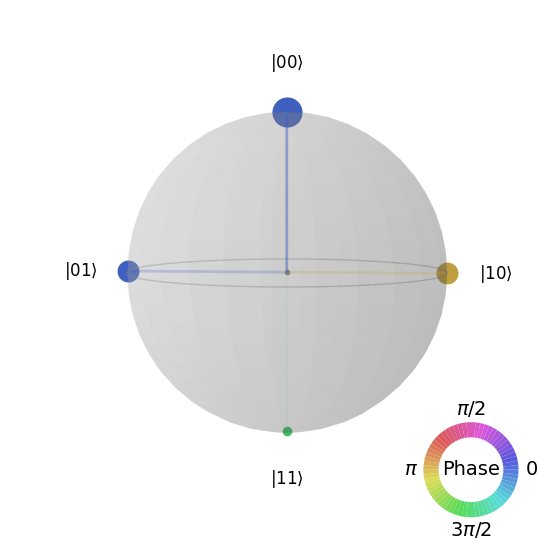

In [3]:
plot_state_qsphere([-0.7, -0.5, 0.5,  0.2j])

Dieses Beispiel zeigt:

- Die Funktion `plot_state_qsphere()` verlangt keinen normierten Vektor
- Die Grösse der Punkte (Durchmesser) entspricht den Amplituden der Komponenten
- Die farbig codierte Phase ist relativ, sie bezieht sich hier auf die Komponenten mit dem grössten *Gewicht*.
- Die Amplitude von $|11\rangle$ ist rein imaginär, d. h. sie liegt auf der $y$-Achse (in der Blochkugel-Darstellung) und steht somit im Winkel von $90°$ zu den anderen Komponenten.



Bectrachten wir nun ein Beispiel mit drei Qubits: 

Z. B. den Zustandsvektor: `[0.1, 0.2, 0.3j, 0.4, 0.5, 0.6j, 0.7,-0.8]`



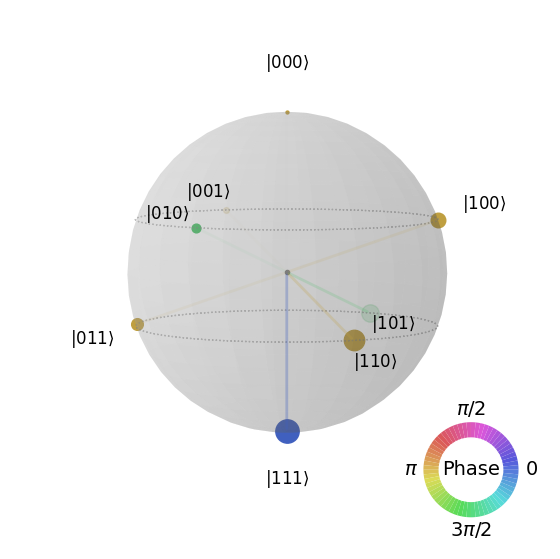

In [4]:
plot_state_qsphere([0.1, 0.2, 0.3j, 0.4, 0.5, 0.6j, 0.7,-0.8])

Auch hier sehen wir, wie die Komponenten auf der Kugel verteilt werden: Von oben nach unten gleichmässig auf Breitenkreise verteilt entsprechend der Quersumme. Ausserden erkennt man in beiden Beipielen, die Reihenfolge der Basisvektoren, nämlich nach ansteigendem Binärwert. 

## Ergebnis des Statevector Simulators ausgeben

Nun schauen wir uns noch an, wie die Funktion `plot_state_qsphere()` konkret für eine Berechnung eingesetzt wird. Dazu definieren wir einen Quantenschaltkreis mit drei Qubits und wenden auf alle Qubits die Hadamard Transformation an.


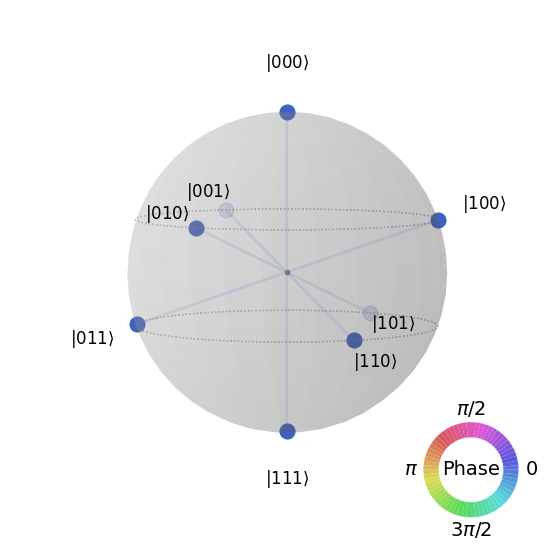

In [5]:
from qiskit import QuantumCircuit, execute, BasicAer

# Quantenschaltkreis mit drei Qubits definieren definierenCreating a Quantum Circuit to run on the Statevector Simulator
qc=QuantumCircuit(3)

# Die Hadamard Transformation auf alle drei Qubits anwenden
qc.h([0,1,2])

# Als Backend den Statevector Simulator definieren
backend = BasicAer.get_backend('statevector_simulator')

# Den Quantenschaltkreis ausführen
job=execute(qc, backend)

# Das Resultat der Berechnung auslesen
result = job.result()

# Den Zustandsvektor extrahieren
state_vec = result.get_statevector()

# Die Q-Sphere plotten
plot_state_qsphere(state_vec)

Wir erhalten eine  Superposition der acht Basisvektoren $|000\rangle$, $|001\rangle$, $|010\rangle$, ... , $|111\rangle$, wobei alle dieselbe Amplitude haben. Wollen wir wissen, wie gross diese Amplitude ist, printen wir den Statevector aus:

In [6]:
print(state_vec)

[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


Wir können uns auch noch den Quantenschaltkreis zeichnen lassen:

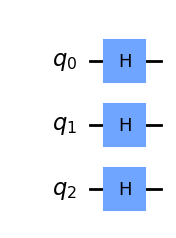

In [7]:
qc.draw ('mpl')

Wir haben somit drei Qubits je im Zustand $\frac{1}{\sqrt{2}}|0\rangle+\frac{1}{\sqrt{2}}|1\rangle=\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$.

Wie Sie wissen, berechnet sich der Registerzustand nun als Produkt der drei Zustandsfunktionen, also zu:
$$
\left[\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)\right]^3=\frac{1}{\sqrt{2}}\frac{1}{\sqrt{2}}\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)\left(|0\rangle+|1\rangle\right)\left(|0\rangle+|1\rangle\right)=\frac{1}{2}\frac{1}{\sqrt{2}}\left(|000\rangle+|001\rangle+|010\rangle+|011\rangle+|100\rangle+|101\rangle+|110\rangle+|111\rangle\right)
$$

Die Amplituden rechnen wir mit dem Taschenrechner aus: $\frac{1}{2}\frac{1}{\sqrt{2}}=0.35355339054$. Das ist exakt der Wert, den uns der Statvector ausgegeben hat.

**Experimentieren Sie nach eigenem Gutdünken weiter!** Erhöhen Sie z. B. die Anzahl Qubits und führen Sie weitere Gates ein.